<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [22]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.0 Variable Identification

In [23]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [24]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [25]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [26]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


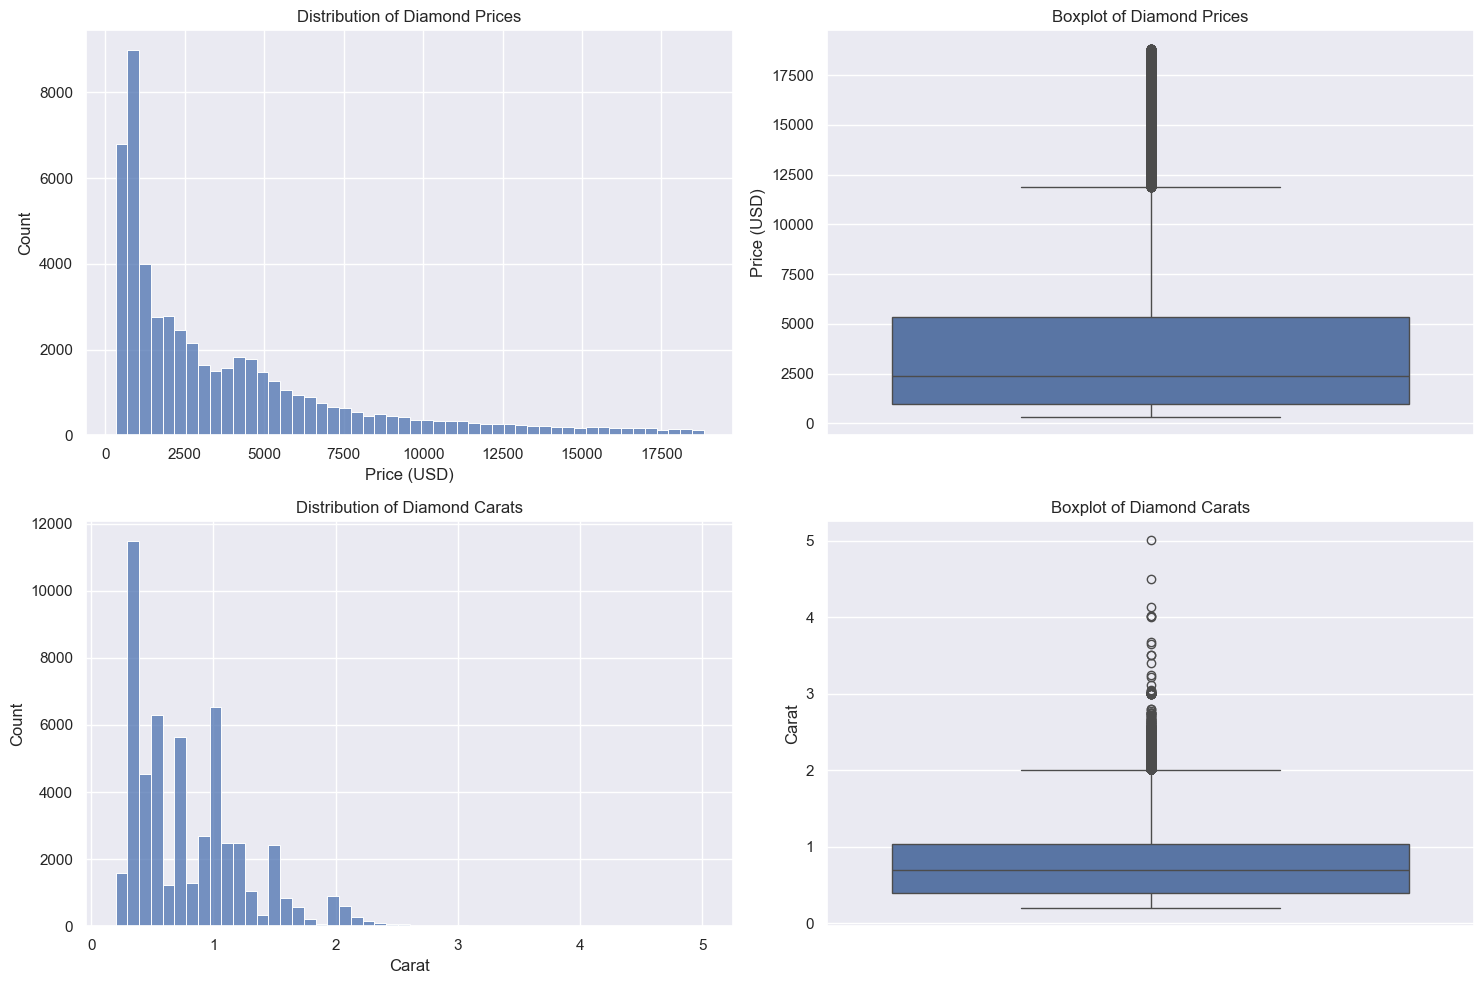

In [27]:
# Create a figure with 2 rows and 2 columns
plt.figure(figsize=(15, 10))

# Price distribution histogram
plt.subplot(2,2,1)
sns.histplot(data=diamonds, x='price', bins=50)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')

# Price boxplot
plt.subplot(2,2,2)
sns.boxplot(y=diamonds['price'])
plt.title('Boxplot of Diamond Prices')
plt.ylabel('Price (USD)')

# Carat distribution histogram
plt.subplot(2,2,3)
sns.histplot(data=diamonds, x='carat', bins=50)
plt.title('Distribution of Diamond Carats')
plt.xlabel('Carat')
plt.ylabel('Count')

# Carat boxplot
plt.subplot(2,2,4)
sns.boxplot(y=diamonds['carat'])
plt.title('Boxplot of Diamond Carats')
plt.ylabel('Carat')

plt.tight_layout()


# Based on the exploratory analysis of price and carat distributions:
#
# Price Distribution Analysis:
 - Distribution exhibits strong right-skew (positive skew)
 - Price range: $326 to $18,823
 - Median price: $2,401
 - Mean price: $3,933 (higher than median due to right skew)
 - Notable presence of high-value outliers
 - High concentration in lower price segments
#
# Carat Distribution Analysis:  
 - Similarly right-skewed distribution pattern
 - Carat range: 0.2 to 5.01 carats
 - Median carat: 0.7
 - Mean carat: 0.80 (higher than median due to right skew)
 - Outliers present in upper carat ranges
 - Dense clustering in lower carat ranges
#
# Key Insights:
 1. Both distributions demonstrate pronounced positive skew, indicating higher frequency of lower-valued diamonds
 2. Strong positive correlation likely exists between price and carat (to be validated)
 3. Premium segment exists with significantly higher prices/carats, shown by outliers
 4. Data suggests typical diamond market pyramid: many affordable options, fewer luxury pieces


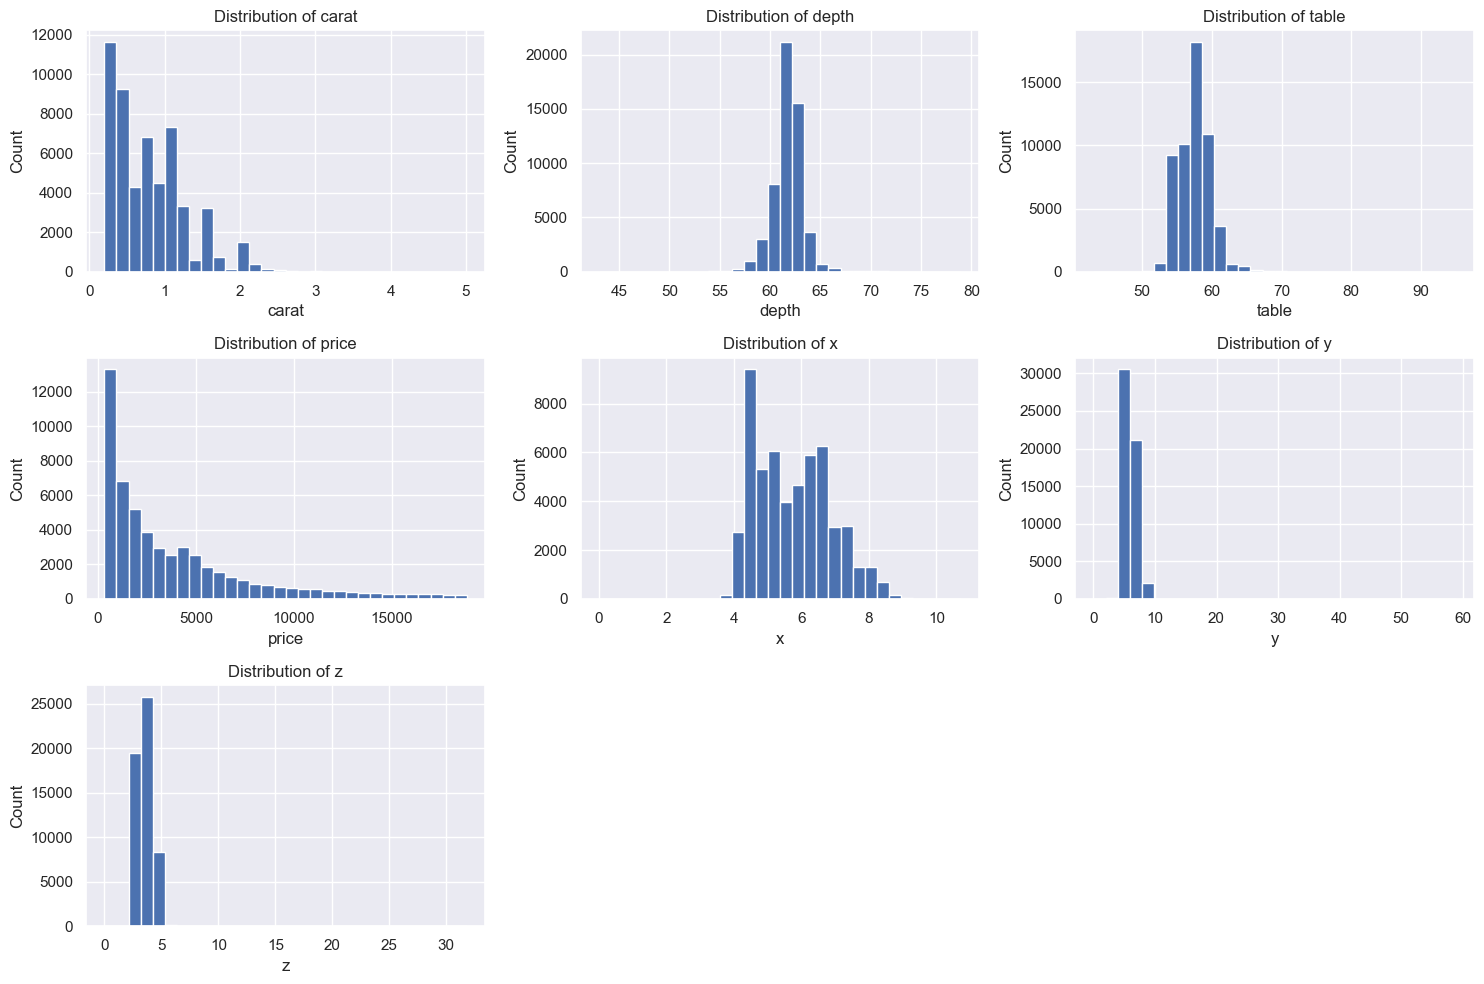

In [28]:

# Create a figure with subplots for histograms of numeric variables
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(3,3,i)
    plt.hist(numeric_cols[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()


# # # Numeric Variable Distribution Analysis
# #
# Detailed analysis of the distribution patterns for each numeric variable:
# #
# Price Distribution:
 - Strongly right-skewed with most diamonds priced under $5,000
 - Mean: $3,933, Median: $2,401 (skew confirmed by mean > median)
 - Contains outliers extending up to $18,823
# #
 # Carat Distribution:
 - Right-skewed with concentration between 0.2-1.0 carats
 - Mean: 0.80, Median: 0.70 carats
 - Outliers present up to 5.01 carats
# #
 # Depth Distribution:
 - Normal/bell-shaped distribution
 - Centered tightly around 61-62%
 - Most values fall between 60-63%
 - Very few outliers, suggesting industry standard ranges
# #
# Table Distribution:
 - Approximately normal distribution
 - Centered at 57-58
 - Majority of values between 55-60
 - Some outliers at both extremes (43-95)
# #
# Dimensional Measurements (x, y, z):
 - All three dimensions show right-skewed patterns
 - Strong correlation with carat size (larger carats = larger dimensions)
 - x and y measurements (length/width) typically between 4-7mm
 - z measurement (depth) typically between 2.5-4.5mm
 - Contains some zero values that may need investigation


### 2.2 For categorical variables: frequency table, count plot


Cut frequency:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Color frequency:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

Clarity frequency:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


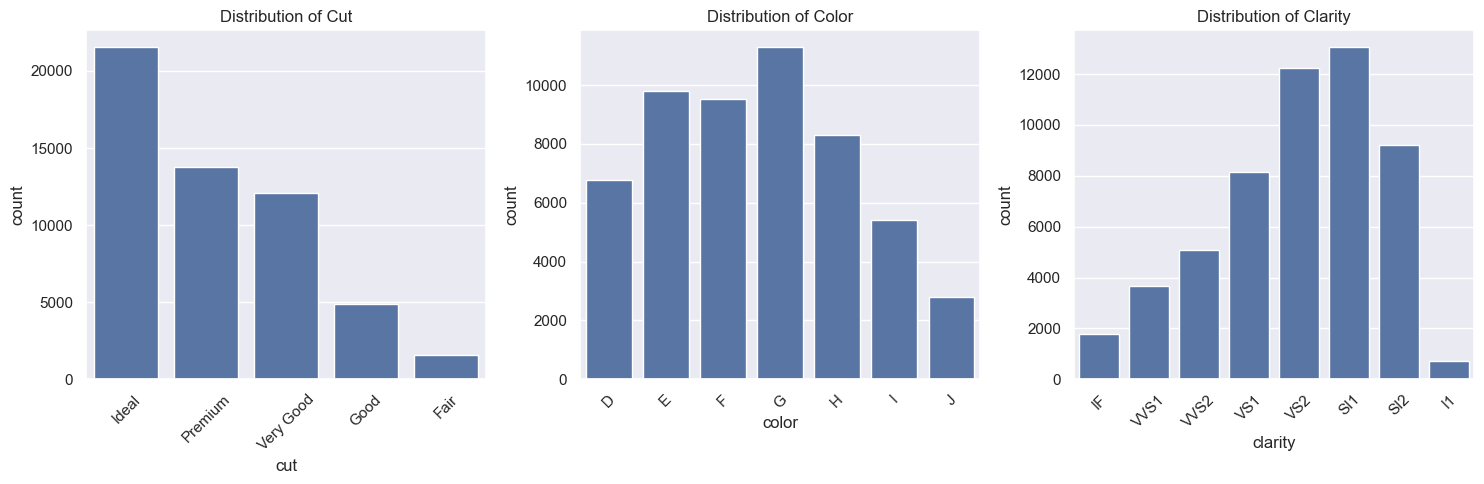

In [34]:
df=diamonds

# Frequency tables for categorical variables
print("\nCut frequency:")
print(df['cut'].value_counts())
print("\nColor frequency:")
print(df['color'].value_counts()) 
print("\nClarity frequency:")
print(df['clarity'].value_counts())

# Create count plots for each categorical variable
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.countplot(data=df, x='cut')
plt.title('Distribution of Cut')
plt.xticks(rotation=45)

plt.subplot(132)
sns.countplot(data=df, x='color')
plt.title('Distribution of Color')
plt.xticks(rotation=45)

plt.subplot(133)
sns.countplot(data=df, x='clarity')
plt.title('Distribution of Clarity')
plt.xticks(rotation=45)

plt.tight_layout()


# Key observations from categorical variables:
 - Cut: Ideal cut is most common (21.5K), followed by Premium (13.8K) and Very Good (12K). Fair cut is least common (1.6K).
 - Color: G color is most frequent, followed by E and F. J color is least common.
 - Clarity: SI1 and VS2 are the most common clarity grades, while IF (internally flawless) is the rarest.
# 
# The distributions show clear preferences in the diamond market, with higher quality cuts being more prevalent.


## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

### 3.2 Categorical & Categorical: stacked column chart

### 3.3 Categorical & Continuous: boxplots

### 3.4 Correlation Analysis: correlation matrix

## 4.0 Missing Value Analysis

In [14]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [15]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64